In [1]:
print("to jest notebook do realizacji analizy rozkładów statystycznych")

to jest notebook do realizacji analizy rozkładów statystycznych


Analiza czasu reakcji kierowców i **dopasowanie** <span style="color:red;font-size:16pt;">rozkładu</span>!

In [8]:
#wygenrowanie danych
#większość ludzi reaguje 0.2 - 0.7s , ale czasem są spóżnienia

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
czasy_reakcji = np.concatenate([
    np.random.normal(0.25,0.07,90),#normalne reaklcje
    np.random.exponential(0.3,10)+0.85
])

czasy_reakcji= czasy_reakcji[czasy_reakcji>0]
czasy_reakcji

array([0.28476999, 0.2403215 , 0.2953382 , 0.35661209, 0.23360926,
 0.23361041, 0.3605449 , 0.30372043, 0.21713679, 0.2879792 ,
 0.21756076, 0.21739892, 0.26693736, 0.11607038, 0.12925575,
 0.21063987, 0.17910182, 0.27199731, 0.18643831, 0.15113874,
 0.35259541, 0.23419566, 0.25472697, 0.15026763, 0.21189321,
 0.25776458, 0.16943045, 0.27629886, 0.20795529, 0.22958144,
 0.20788054, 0.37965947, 0.24905519, 0.17596023, 0.30757814,
 0.16454094, 0.26462045, 0.11282309, 0.15702698, 0.26378029,
 0.30169266, 0.26199578, 0.24190462, 0.22892274, 0.14650346,
 0.19961091, 0.21775529, 0.32399856, 0.27405328, 0.12658719,
 0.27268588, 0.22304424, 0.20261546, 0.29281734, 0.32216997,
 0.31518961, 0.19125477, 0.22835513, 0.27318844, 0.31828816,
 0.2164578 , 0.23700387, 0.17255655, 0.16626554, 0.30687681,
 0.3449368 , 0.24495929, 0.3202473 , 0.27531452, 0.20484162,
 0.27529769, 0.35766256, 0.24749218, 0.35952506, 0.06661784,
 0.30753318, 0.25609329, 0.22906949, 0.25642325, 0.11087018,
 0.23462297, 0.27499788, 0.35345258, 0.21372108, 0.19340545,
 0.21487701, 0.31407815, 0.27301258, 0.21291679, 0.28592872,
 1.51924402, 1.08252997, 1.34420449, 1.52927279, 0.96481921,
 0.88497765, 0.92760602, 1.01711731, 1.36114892, 1.44140349])

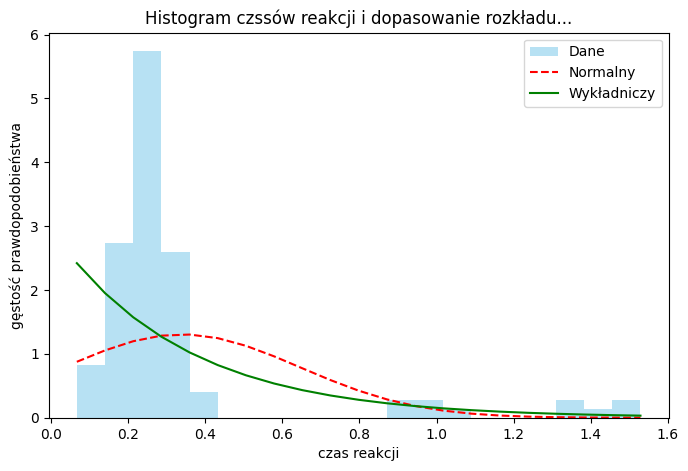

In [9]:
#wizualizacja danych
from scipy.stats import norm,expon

plt.figure(figsize=(8,5))
cont,bins,ignored = plt.hist(czasy_reakcji,bins=20,density=True,alpha=0.6,color="skyblue",label="Dane")

#dopasowanie rozkładu normalnego
mu, sigma = norm.fit(czasy_reakcji)
plt.plot(bins,norm.pdf(bins,mu,sigma),'r--',label="Normalny")

#dopasowanie rozkładu wykładniczego
loc, scale = expon.fit(czasy_reakcji,floc=0)
plt.plot(bins,expon.pdf(bins,loc,scale),'g-',label="Wykładniczy")

plt.xlabel("czas reakcji")
plt.ylabel("gęstość prawdopodobieństwa")
plt.title("Histogram czssów reakcji i dopasowanie rozkładu...")

plt.legend()
plt.show()

In [10]:
#test normalności Shapiro - Wilka
from scipy.stats import shapiro

stat, p = shapiro(czasy_reakcji)

print(f"Statystyka Shapiro-Wilka: {round(stat,4)}")
print(f"p-value:{round(p,4)}")

if p<0.05:
    print("Odrzucamy hipotezę o nrmalności rozkadu")
else:
    print("brak podstaw do odrzucenia normalności")

Statystyka Shapiro-Wilka: 0.5526
p-value:0.0
Odrzucamy hipotezę o nrmalności rozkadu
